['hgemmoneproblem_5_2024-05-22_02-56-28.csv', 'hgemmoneproblem_11_2024-05-22_02-56-28.csv', 'hgemmoneproblem_10_2024-05-22_02-56-28.csv', 'hgemmoneproblem_8_2024-05-22_02-56-28.csv', 'hgemmoneproblem_16_2024-05-22_02-56-28.csv', 'hgemmoneproblem_9_2024-05-22_02-56-28.csv', 'hgemmoneproblem_15_2024-05-22_02-56-28.csv', 'hgemmoneproblem_7_2024-05-22_02-56-28.csv', 'hgemmoneproblem_13_2024-05-22_02-56-28.csv', 'hgemmoneproblem_0_2024-05-22_02-56-28.csv', 'hgemmoneproblem_12_2024-05-22_02-56-28.csv', 'hgemmoneproblem_3_2024-05-22_02-56-28.csv', 'hgemmoneproblem_2_2024-05-22_02-56-28.csv', 'hgemmoneproblem_0_2024-05-22_02-38-49.csv', 'hgemmoneproblem_14_2024-05-22_02-56-28.csv', 'hgemmoneproblem_1_2024-05-22_02-56-28.csv', 'hgemmoneproblem_6_2024-05-22_02-56-28.csv', 'hgemmoneproblem_4_2024-05-22_02-56-28.csv']


/tmp/ipykernel_3302249/3942791403.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs).reset_index()


0          Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...
1          Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...
2          Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...
3          Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...
4          Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...
                                 ...                        
1168155    Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...
1168156    Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...
1168157    Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...
1168158    Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...
1168159    Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...
Name: solution, Length: 1168160, dtype: object


,index,run,problem-progress,solution-progress,operation,problem-sizes,solution,validation,time-us,gflops,...,clock-soc,clock-mem,fan-rpm,hardware-samples,gfx-frequency(median),power(median),hotspot-temperature(median),enqueue-time,Macro_Tile,Matrix_Instruction
0,0,0,0/48,0/4703,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,128,1,128)",Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...,NO_CHECK,58.2994,71.9442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:52:53.,MT64x512x16,MI16x16x16x1
1,1,0,0/48,1/4703,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,128,1,128)",Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...,NO_CHECK,56.2026,74.6283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:52:53.,MT64x512x16,MI16x16x16x1
2,2,0,0/48,2/4703,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,128,1,128)",Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...,NO_CHECK,59.7967,70.1428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:52:53.,MT64x512x16,MI16x16x16x1
3,3,0,0/48,3/4703,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,128,1,128)",Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...,NO_CHECK,59.3576,70.6616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:52:53.,MT64x512x16,MI16x16x16x1
4,4,0,0/48,4/4703,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,128,1,128)",Cijk_Ailk_Bjlk_HHS_BH_MT64x512x16_MI16x16x16x1...,NO_CHECK,58.0886,72.2053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:52:53.,MT64x512x16,MI16x16x16x1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168155,47819,0,48/48,971/975,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,8192,1,8192)",Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...,NO_CHECK,230.3650,74576.6000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:46:45.,MT16x64x64,MI16x16x16x1
1168156,47820,0,48/48,972/975,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,8192,1,8192)",Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...,NO_CHECK,247.7960,69330.6000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:46:45.,MT16x64x64,MI16x16x16x1
1168157,47821,0,48/48,973/975,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,8192,1,8192)",Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...,NO_CHECK,248.1720,69225.6000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:46:46.,MT16x64x64,MI16x16x16x1
1168158,47822,0,48/48,974/975,Contraction_l_Ailk_Bjlk_Cijk_Dijk,"(128,8192,1,8192)",Cijk_Ailk_Bjlk_HHS_BH_MT16x64x64_MI16x16x16x1_...,NO_CHECK,247.3450,69457.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-22 04:46:46.,MT16x64x64,MI16x16x16x1


['(128,8192,1,1024)' '(128,8192,1,2048)' '(128,8192,1,4096)'
 '(128,8192,1,8192)']


100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


<Figure size 640x480 with 0 Axes>

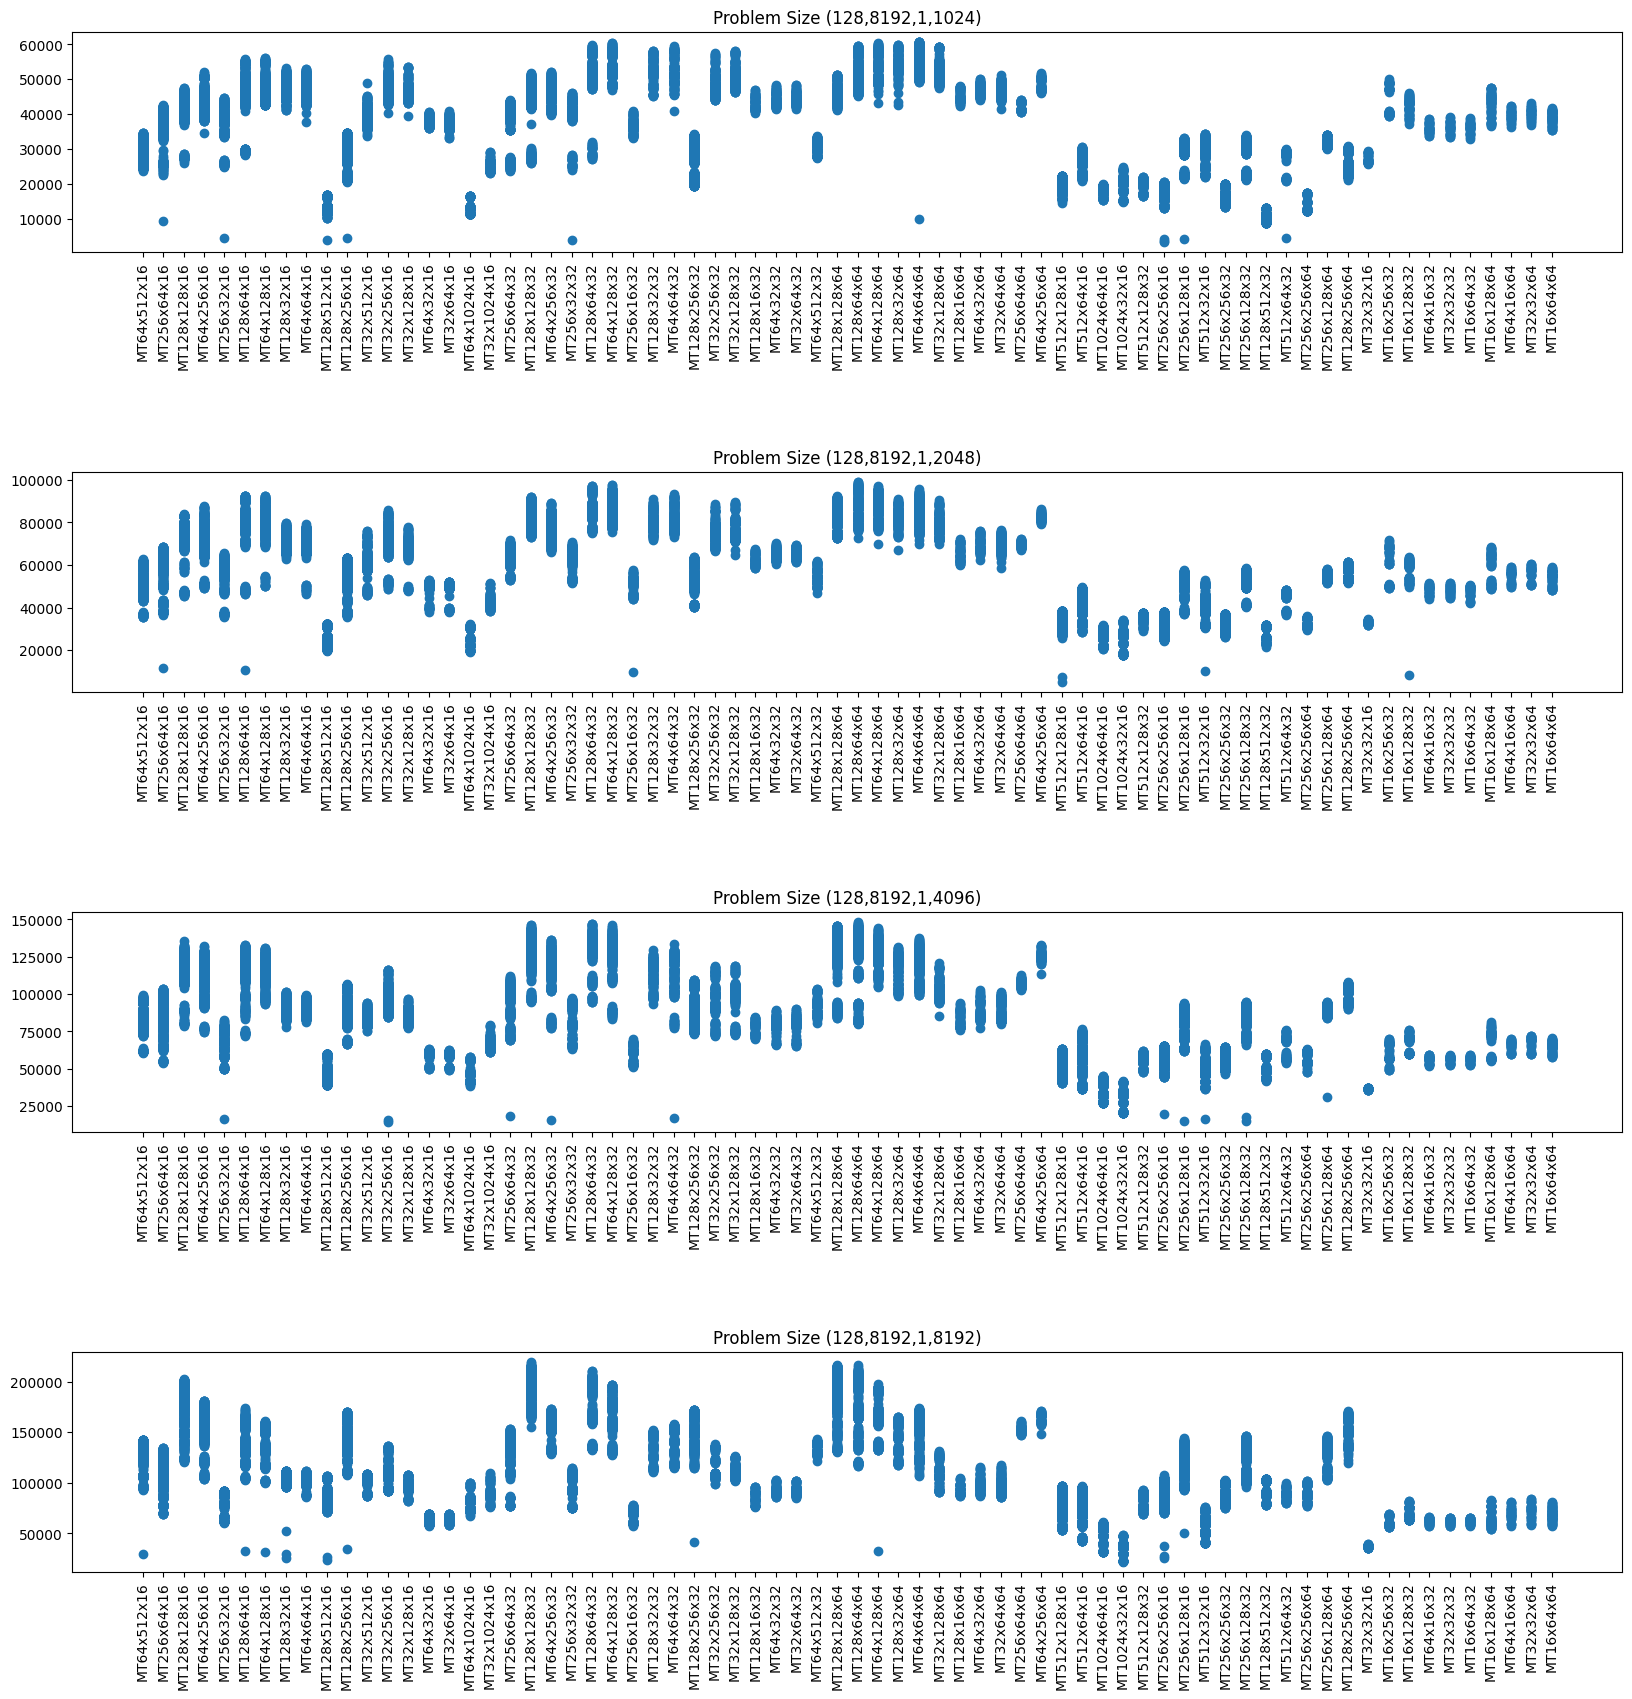

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
base_dir = "/home/ryaswann/Tensile_skoptions/experiments/oneproblem_hgemm_yamls/exploration_results"
files = os.listdir(f"{base_dir}")
print(files)
tempFiles = []
for file in files:
    if ".csv" in file:
        tempFiles.append(file)
files = tempFiles

dfs = []
for infile in (files):
    try:
        #print(f"Loading {infile}")
        out = open("tensile_temp.csv","w")
        input = open(f"{base_dir}/{infile}","r")
        out.write("run,problem-progress,solution-progress,operation,problem-sizes,solution,validation,time-us,gflops,empty,total-gran,tiles-per-cu,num-cus,tile0-gran,tile1-gran,cu-gran,wave-gran,mem-read-bytes,mem-write-bytes,temp-edge,clock-sys,clock-soc,clock-mem,fan-rpm,hardware-samples,gfx-frequency(median),power(median),hotspot-temperature(median),enqueue-time\n")
        #print("hi")
        for line in input:
            #print(line)
            if len(line.split(",")) > 3 and ("Contraction" in line):
                out.write(line)
        #print("Closing")
        out.close()
        df = pd.read_csv("tensile_temp.csv")
        #print(df)
        dfs.append(df)
        #display(df)

    except pd.errors.EmptyDataError:
        print("bleh")

    except UnicodeDecodeError:
        print("heck")

df = pd.concat(dfs).reset_index()
print(df["solution"])
df["Macro_Tile"] = df["solution"].str.split("_",expand=True)[5]
df["Matrix_Instruction"] = df["solution"].str.split("_",expand=True)[6]

df.to_csv("results.csv")
#df = df.loc[df["problem-sizes"] == "(4096,4096,1,4096)"]
display(df)

thing_to_plot_y="gflops"
thing_to_plot_x = "Macro_Tile"
thing_to_color="Matrix_Instruction"
colors = ["red","blue"]
unique_problem_sizes = df["problem-sizes"].unique()
problem_size_cnt = 0

plt.clf()
#unique_problem_sizes = unique_problem_sizes[-4:]
fig,axs = plt.subplots(len(unique_problem_sizes),1,figsize=(20,5 * len(unique_problem_sizes)))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
print(unique_problem_sizes)
for problem_size in tqdm(unique_problem_sizes):
    #axs[].figure(figsize=(20,5))
    #axs[problem_size_cnt][1].grid()
    temp_df = df.loc[df["problem-sizes"] == problem_size]
    #temp_df = df.loc[df["Matrix_Instruction"] == matrix_instruction]
    sc=axs[problem_size_cnt].scatter(temp_df[thing_to_plot_x],temp_df[thing_to_plot_y])
    #axs[problem_size_cnt].set_xticks(temp_df[thing_to_plot_x],temp_df[thing_to_plot_x],rotation=90)
    for tick in axs[problem_size_cnt].get_xticklabels():
        tick.set_rotation(90)
    #axs[problem_size_cnt].set_xticklabels(axs[problem_size_cnt].get_xticks(), rotation = 90)
    #plt.title(matrix_instruction)
    if thing_to_color == "gflops":
        plt.colorbar(sc)
    axs[problem_size_cnt].set_title(f"Problem Size {problem_size}")
    #plt.show()
    #plt.clf()
    problem_size_cnt = problem_size_cnt + 1